In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 4
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews


In [3]:
df=pd.DataFrame(reviews)

In [4]:
df

,0
0,✅ Trip Verified | We were traveling as a fami...
1,✅ Trip Verified | Flight at 8.40am from DUB to...
2,✅ Trip Verified | Terrible. I have traveled t...
3,✅ Trip Verified | The customer service is ugl...
4,✅ Trip Verified | Most uncomfortable flight I...
...,...
395,✅ Trip Verified | Year after year the British ...
396,✅ Trip Verified | BA used to be my go to carr...
397,✅ Trip Verified | The entertainment system wa...
398,✅ Trip Verified | I flew on British Airways C...


In [5]:
df.columns=["reviews"]

In [6]:
df

,reviews
0,✅ Trip Verified | We were traveling as a fami...
1,✅ Trip Verified | Flight at 8.40am from DUB to...
2,✅ Trip Verified | Terrible. I have traveled t...
3,✅ Trip Verified | The customer service is ugl...
4,✅ Trip Verified | Most uncomfortable flight I...
...,...
395,✅ Trip Verified | Year after year the British ...
396,✅ Trip Verified | BA used to be my go to carr...
397,✅ Trip Verified | The entertainment system wa...
398,✅ Trip Verified | I flew on British Airways C...


In [7]:
df["reviews"]=df["reviews"].str.replace(" Trip Verified | "," ")

/tmp/ipykernel_28/3464698364.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["reviews"]=df["reviews"].str.replace(" Trip Verified | "," ")


In [8]:
df["reviews"]=df["reviews"].str.replace("Not Verified | "," ")

/tmp/ipykernel_28/4075636215.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["reviews"]=df["reviews"].str.replace("Not Verified | "," ")


In [9]:
df["reviews"][200]

' |  We had a nice flight. pushed-off exactly on time. Cabin crew very efficient in all things; friendly for the most part as well. Dinner (hot!) and complimentary wine served in premium economy very good. Do avoid middle seats though, even in premium economy. Only issue was with indifferent/non-helpful BA call center who refused to honor one world status to select seat choice in advance. Nice start to a 3 week trip to England.'

In [10]:
#when need to save separTELY
#df.to_csv("data.csv")

In [11]:
example=df['reviews'][70]

In [12]:
example

'✅ |  The latest affront. Stood in first class line for an hour. Finally go up front and the BA agent let 4 supposed VIPS with 12-14 large to-be-checked bags in front of all of us. Arrogant and unapologetic. Add this to a long list of post-Covid disappointments. We are done with BA.'

In [13]:
#NLP part

In [14]:
import nltk

In [15]:
tokens=nltk.word_tokenize(example)

In [16]:
tokens

['✅',
 '|',
 'The',
 'latest',
 'affront',
 '.',
 'Stood',
 'in',
 'first',
 'class',
 'line',
 'for',
 'an',
 'hour',
 '.',
 'Finally',
 'go',
 'up',
 'front',
 'and',
 'the',
 'BA',
 'agent',
 'let',
 '4',
 'supposed',
 'VIPS',
 'with',
 '12-14',
 'large',
 'to-be-checked',
 'bags',
 'in',
 'front',
 'of',
 'all',
 'of',
 'us',
 '.',
 'Arrogant',
 'and',
 'unapologetic',
 '.',
 'Add',
 'this',
 'to',
 'a',
 'long',
 'list',
 'of',
 'post-Covid',
 'disappointments',
 '.',
 'We',
 'are',
 'done',
 'with',
 'BA',
 '.']

In [17]:
tagged=nltk.pos_tag(tokens)

In [18]:
tagged[:10]

[('✅', 'NN'),
 ('|', 'VBD'),
 ('The', 'DT'),
 ('latest', 'JJS'),
 ('affront', 'NN'),
 ('.', '.'),
 ('Stood', 'NNP'),
 ('in', 'IN'),
 ('first', 'JJ'),
 ('class', 'NN')]

In [19]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  ✅/NN
  |/VBD
  The/DT
  latest/JJS
  affront/NN
  ./.
  Stood/NNP
  in/IN
  first/JJ
  class/NN
  line/NN
  for/IN
  an/DT
  hour/NN
  ./.
  Finally/RB
  go/VB
  up/RP
  front/RB
  and/CC
  the/DT
  (ORGANIZATION BA/NNP)
  agent/NN
  let/VBD
  4/CD
  supposed/VBN
  (ORGANIZATION VIPS/NNP)
  with/IN
  12-14/JJ
  large/JJ
  to-be-checked/JJ
  bags/NNS
  in/IN
  front/NN
  of/IN
  all/DT
  of/IN
  us/PRP
  ./.
  Arrogant/JJ
  and/CC
  unapologetic/JJ
  ./.
  Add/VB
  this/DT
  to/TO
  a/DT
  long/JJ
  list/NN
  of/IN
  post-Covid/JJ
  disappointments/NNS
  ./.
  We/PRP
  are/VBP
  done/VBN
  with/IN
  (ORGANIZATION BA/NNP)
  ./.)


VADER ANALYSIS(STEP 1)


In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [21]:
from tqdm.notebook import tqdm

In [22]:
sia=SentimentIntensityAnalyzer()

In [23]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [24]:
sia.polarity_scores("do not come near me as i am angry")

{'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.5106}

In [25]:
example

'✅ |  The latest affront. Stood in first class line for an hour. Finally go up front and the BA agent let 4 supposed VIPS with 12-14 large to-be-checked bags in front of all of us. Arrogant and unapologetic. Add this to a long list of post-Covid disappointments. We are done with BA.'

In [26]:
sia.polarity_scores(example)

{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'compound': -0.7351}

In [27]:
z=0
while z<400:
    res={}
    for i,row in tqdm(df.iterrows(),total=len(df)):
        text= row['reviews']
        
        res[z]=sia.polarity_scores(text)
        z=z+1

  0%|          | 0/400 [00:00<?, ?it/s]

In [28]:
res

{0: {'neg': 0.082, 'neu': 0.832, 'pos': 0.086, 'compound': 0.1189},
 1: {'neg': 0.161, 'neu': 0.728, 'pos': 0.111, 'compound': -0.9632},
 2: {'neg': 0.292, 'neu': 0.672, 'pos': 0.036, 'compound': -0.9493},
 3: {'neg': 0.125, 'neu': 0.875, 'pos': 0.0, 'compound': -0.6908},
 4: {'neg': 0.101, 'neu': 0.832, 'pos': 0.067, 'compound': -0.323},
 5: {'neg': 0.053, 'neu': 0.904, 'pos': 0.044, 'compound': -0.2996},
 6: {'neg': 0.1, 'neu': 0.9, 'pos': 0.0, 'compound': -0.8476},
 7: {'neg': 0.041, 'neu': 0.924, 'pos': 0.034, 'compound': -0.25},
 8: {'neg': 0.084, 'neu': 0.856, 'pos': 0.06, 'compound': -0.739},
 9: {'neg': 0.0, 'neu': 0.666, 'pos': 0.334, 'compound': 0.9903},
 10: {'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'compound': -0.7841},
 11: {'neg': 0.18, 'neu': 0.795, 'pos': 0.025, 'compound': -0.8957},
 12: {'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'compound': -0.91},
 13: {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.765},
 14: {'neg': 0.151, 'neu': 0.804, 'pos': 0.045, 'compound

In [29]:
vaders=pd.DataFrame(res).T

In [30]:
vaders.rename(columns={"neg": "vad_neg",'neu':'vad_neu','pos':'vad_pos','compound':'vad_comp'}, inplace=True)

In [31]:
df1=pd.concat([vaders, df], axis=1)
df1


,vad_neg,vad_neu,vad_pos,vad_comp,reviews
0,0.082,0.832,0.086,0.1189,✅ | We were traveling as a family (5 people)....
1,0.161,0.728,0.111,-0.9632,✅ | Flight at 8.40am from DUB to LCY cancelled...
2,0.292,0.672,0.036,-0.9493,✅ | Terrible. I have traveled twice with them...
3,0.125,0.875,0.000,-0.6908,✅ | The customer service is ugly. Tried calli...
4,0.101,0.832,0.067,-0.3230,✅ | Most uncomfortable flight I have ever exp...
...,...,...,...,...,...
395,0.093,0.867,0.040,-0.9287,✅ | Year after year the British Airways (BA) s...
396,0.065,0.899,0.037,-0.0516,✅ | BA used to be my go to carrier and I am a...
397,0.096,0.778,0.126,0.8091,✅ | The entertainment system was working badl...
398,0.023,0.801,0.175,0.9812,✅ | I flew on British Airways Cheapest Fare w...


In [32]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [33]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [34]:
#VADER RESULTS
print(example)

✅ |  The latest affront. Stood in first class line for an hour. Finally go up front and the BA agent let 4 supposed VIPS with 12-14 large to-be-checked bags in front of all of us. Arrogant and unapologetic. Add this to a long list of post-Covid disappointments. We are done with BA.


sia.polarity_scores(example)

In [35]:
#Run for roberta model now

In [36]:
encoded_text=tokenizer(example,return_tensors="pt")

In [37]:
output=model(**encoded_text)

In [38]:
scores=output[0][0].detach().numpy()

In [39]:
#in this the scores will be in oreder negative,neutral,positive
scores=softmax(scores)
scores

array([0.945466  , 0.04967036, 0.00486369], dtype=float32)

In [40]:
scores_dict={"roberta_neg":scores[0],"roberta_neu":scores[1],"roberta_pos":scores[2]}
scores_dict

{'roberta_neg': 0.945466,
 'roberta_neu': 0.04967036,
 'roberta_pos': 0.004863686}

In [41]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors="pt")
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={"roberta_neg":scores[0],"roberta_neu":scores[1],"roberta_pos":scores[2]}
    return scores_dict

In [60]:
z=0
rob_res={}
while z<400:
    try:
        text=df["reviews"][z]
        rob_res[z]=polarity_scores_roberta(text)
    
        #print(z,rob_res[z])
    except RuntimeError:
        rob_res[z]={'roberta_neg':0.34, 'roberta_neu': 0.33, 'roberta_pos': 0.33}
        #print(z,rob_res[z])
    z=z+1
    
    

In [61]:
roberta_df=pd.DataFrame(rob_res)

In [62]:
df2=pd.concat([roberta_df.T, df1], axis=1)

In [63]:

df2

,roberta_neg,roberta_neu,roberta_pos,vad_neg,vad_neu,vad_pos,vad_comp,reviews
0,0.197343,0.466098,0.336559,0.082,0.832,0.086,0.1189,✅ | We were traveling as a family (5 people)....
1,0.931998,0.060050,0.007952,0.161,0.728,0.111,-0.9632,✅ | Flight at 8.40am from DUB to LCY cancelled...
2,0.978007,0.019019,0.002974,0.292,0.672,0.036,-0.9493,✅ | Terrible. I have traveled twice with them...
3,0.968346,0.028121,0.003534,0.125,0.875,0.000,-0.6908,✅ | The customer service is ugly. Tried calli...
4,0.849265,0.131829,0.018907,0.101,0.832,0.067,-0.3230,✅ | Most uncomfortable flight I have ever exp...
...,...,...,...,...,...,...,...,...
395,0.906686,0.084346,0.008968,0.093,0.867,0.040,-0.9287,✅ | Year after year the British Airways (BA) s...
396,0.807969,0.169628,0.022404,0.065,0.899,0.037,-0.0516,✅ | BA used to be my go to carrier and I am a...
397,0.409857,0.322466,0.267677,0.096,0.778,0.126,0.8091,✅ | The entertainment system was working badl...
398,0.002956,0.031690,0.965354,0.023,0.801,0.175,0.9812,✅ | I flew on British Airways Cheapest Fare w...


In [64]:
df2.columns

Index(['roberta_neg', 'roberta_neu', 'roberta_pos', 'vad_neg', 'vad_neu',
       'vad_pos', 'vad_comp', 'reviews'],
      dtype='object')

In [65]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

AttributeError: 'PairGrid' object has no attribute 'show'

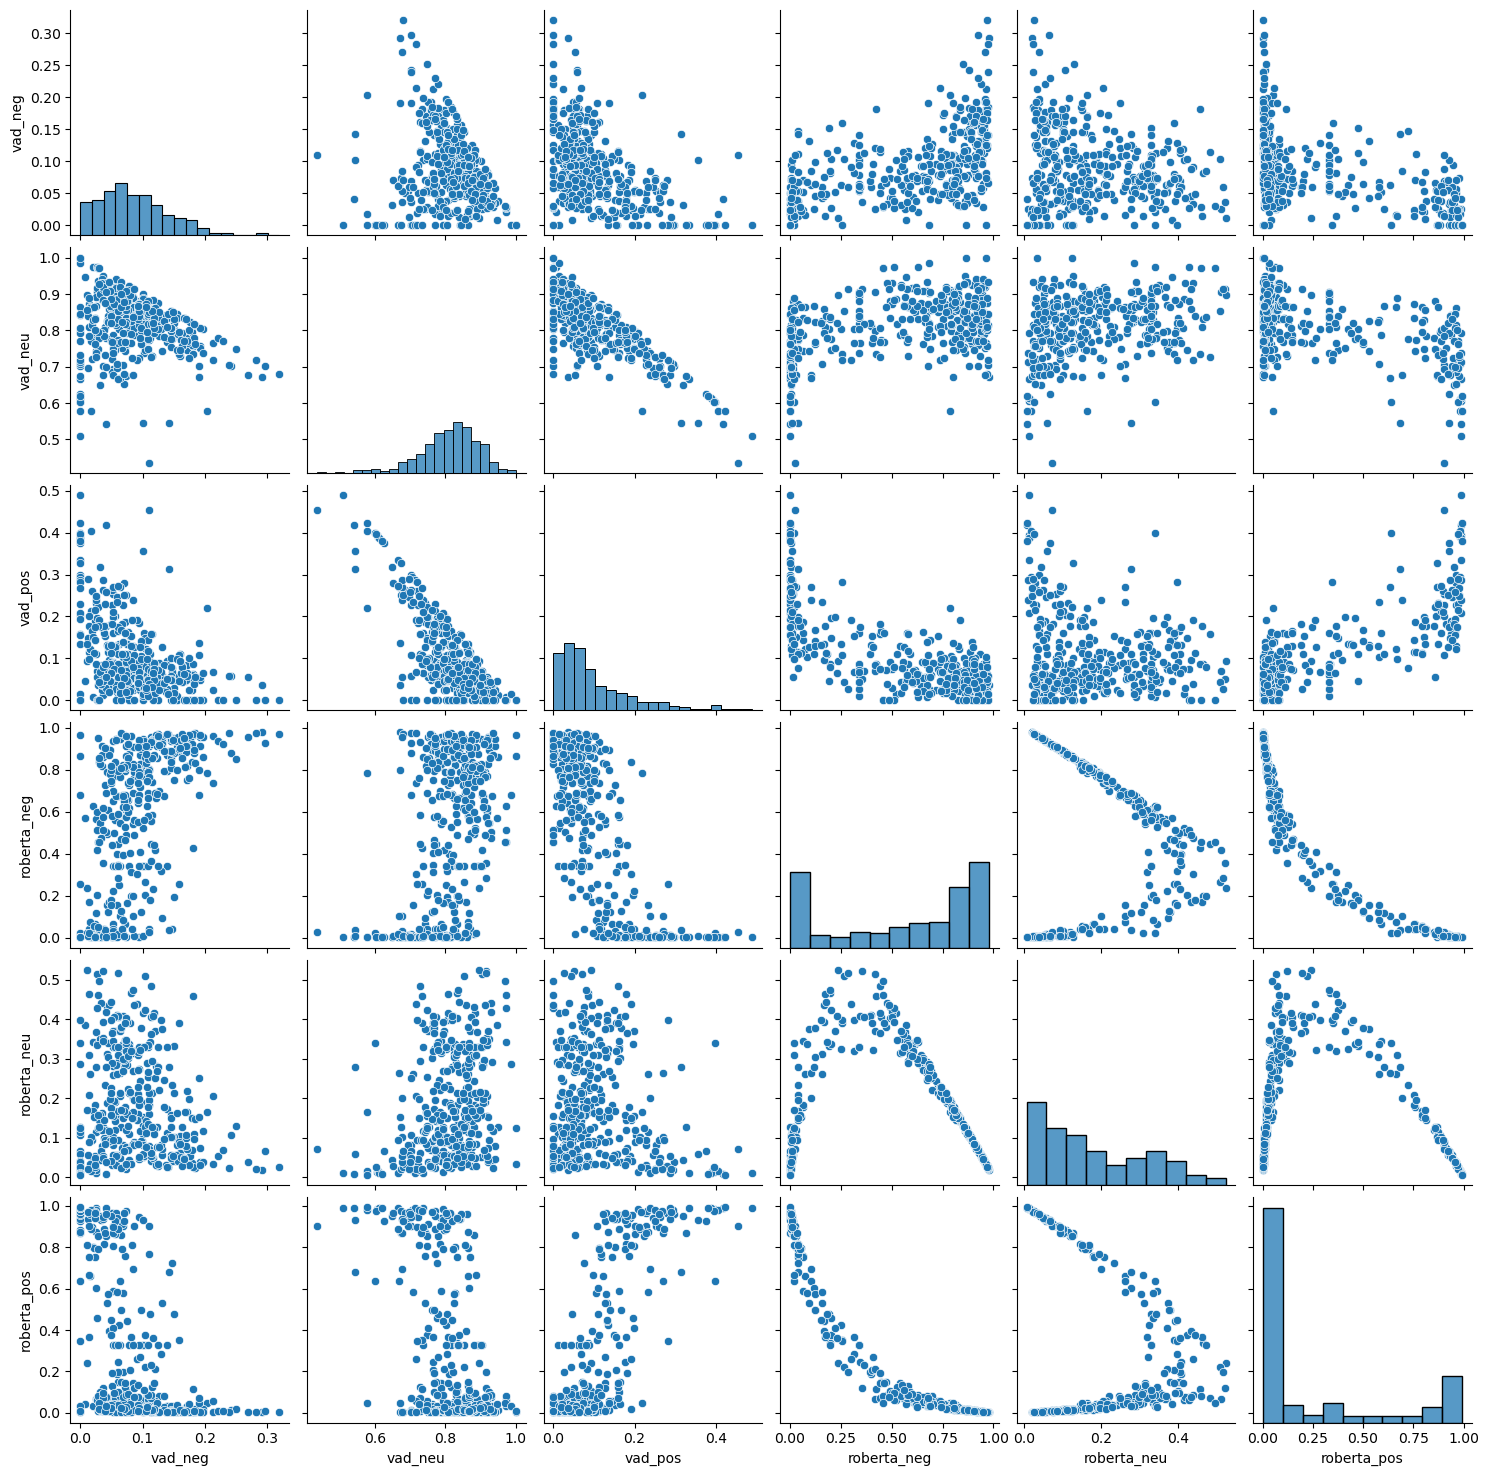

In [94]:
sns.pairplot(data=df2,
             vars=['vad_neg', 'vad_neu', 'vad_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
             
            palette='tab10')
plt.show()